# Визуализация для корпуса ручной разметки

In [60]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/Users/karpovapolina/Downloads/allmergedpoemsfinal.csv')

In [24]:
df

,name,text,diff_norm,rating,novelty,repetition,meaningfulness,emotionality,grammar
0,evgenij-evtushenko-cvety-luchshe-pul,"\nТот, кто любит цветы,\nТот, естественно, пул...",0.224138,4.78,0.942908,0.990910,1,1,1
1,aleksandr-pushkin-prorok,"\nДуховной жаждою томим,\nВ пустыне мрачной я ...",0.066667,4.23,0.940051,0.944943,0,0,1
2,aleksandr-pushkin-ya-pomnyu-chudnoe-mgnovene,\nК Керн*\nЯ помню чудное мгновенье:\nПередо м...,0.120000,4.33,0.934676,0.967430,1,1,1
3,aleksandr-pushkin-ya-vas-lyubil-lyubov-eshhe-b...,"\nЯ вас любил: любовь еще, быть может,\nВ душе...",0.250000,4.43,0.946290,0.883153,1,1,1
4,aleksandr-pushkin-vo-glubine-sibirskix-rud,\nВо глубине сибирских руд\nХраните гордое тер...,0.125000,4.23,0.947998,0.990926,1,1,1
...,...,...,...,...,...,...,...,...,...
1670,1970-01-01 00:10:26,"\nВ мире цветов и огня,\nГде сласть и горечь р...",0.125000,-1.00,0.948542,0.982127,0,0,1
1671,1970-01-01 00:10:27,"\nПод звездным небом, весь в блеске тумана,\nР...",0.250000,-1.00,0.948542,0.982127,0,0,1
1672,1970-01-01 00:10:28,"\nВ дали мирозданной тайны,\nГде вечность розо...",0.250000,-1.00,0.948542,0.982127,0,0,1
1673,1970-01-01 00:10:29,"\nВ творчестве слова сила всегда есть,\nИм мир...",0.388889,-1.00,0.948542,0.982127,0,0,1


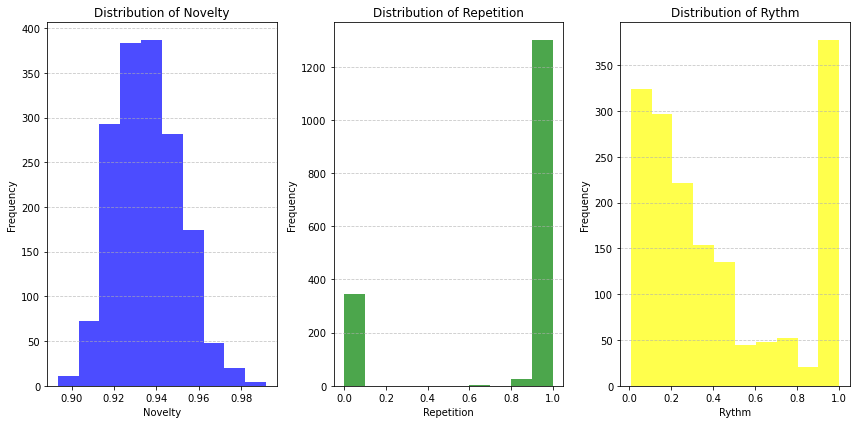

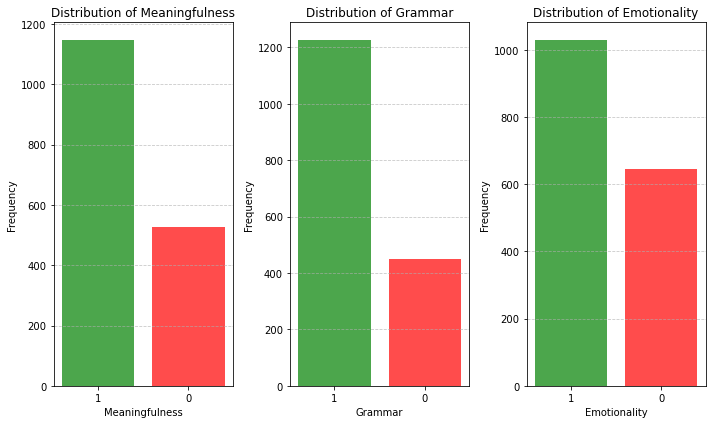

In [27]:
plt.figure(figsize=(12, 6))

# Plotting novelty
plt.subplot(1, 3, 1)
plt.hist(df['novelty'], color='blue', alpha=0.7)
plt.title('Distribution of Novelty')
plt.xlabel('Novelty')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plotting repetition
plt.subplot(1, 3, 2)
plt.hist(df['repetition'], color='green', alpha=0.7)
plt.title('Distribution of Repetition')
plt.xlabel('Repetition')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plotting rythm
plt.subplot(1, 3, 3)
plt.hist(df['diff_norm'], color='yellow', alpha=0.7)
plt.title('Distribution of Rythm')
plt.xlabel('Rythm')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('novelty_repetition_rythm_distribution.png', dpi=300)


plt.figure(figsize=(10, 6))

# Plotting meaningfulness, grammar, and emotionality
params = ['meaningfulness', 'grammar', 'emotionality']
for i, param in enumerate(params, 1):
    plt.subplot(1, 3, i)
    plt.bar(['1', '0'], df[param].value_counts(), color=['green', 'red'], alpha=0.7)
    plt.title(f'Distribution of {param.capitalize()}')
    plt.xlabel(param.capitalize())
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.savefig('meaningfulness_grammar_emotionality_distribution.png', dpi=300)

# Визуализация для корпуса сгенерированных поэм

In [8]:
df_gen = pd.read_csv('/Users/karpovapolina/Downloads/gen_poems_metrics_fin.csv')

In [10]:
df_gen = df_gen.drop('Unnamed: 0', axis = 1)

<Figure size 720x432 with 0 Axes>

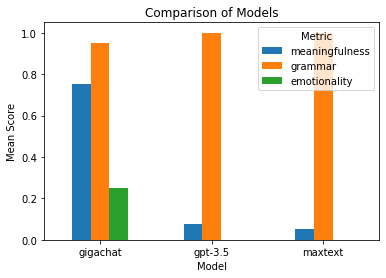

In [51]:
# Comparison of Meaningulness, Grammar and Emotionality across the models

df_relevant = pd.DataFrame(df_gen, columns=['model', 'meaningfulness', 'grammar', 'emotionality'])

df_mean = df_relevant.groupby('model').mean()

plt.figure(figsize=(10, 6))
df_mean.plot(kind='bar')
plt.title('Comparison of Models')
plt.ylabel('Mean Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(title='Metric')

plt.savefig('comparison_plot.png', dpi=300, bbox_inches='tight')

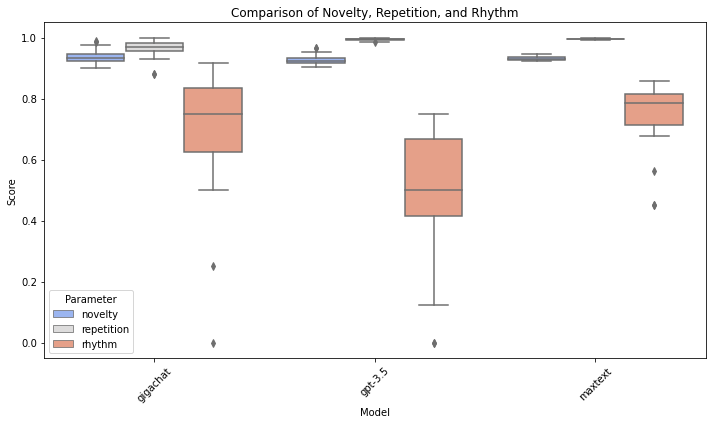

In [53]:
# Comparison of Novelty, Repetition and Rhythm across the models

plt.figure(figsize=(10, 6))
sns.boxplot(x='model', y='value', hue='variable', data=pd.melt(df_gen, id_vars=['model'], value_vars=['novelty', 'repetition', 'rhythm']), palette='coolwarm')
plt.title('Comparison of Novelty, Repetition, and Rhythm')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Parameter')
plt.tight_layout()

plt.savefig('boxplot_comparison.png', dpi=300, bbox_inches='tight')


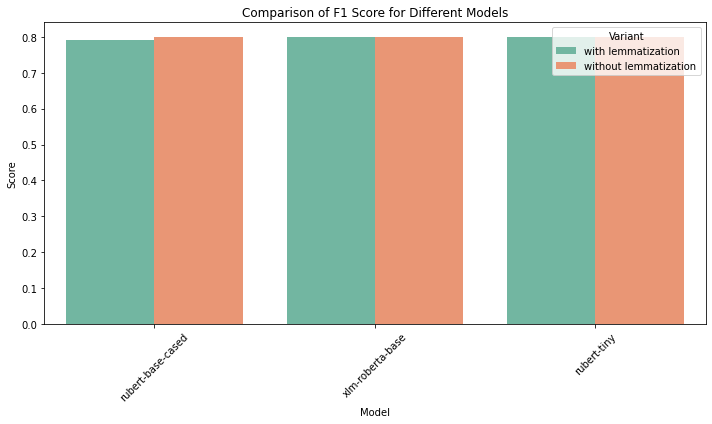

In [56]:
#Comparison of F1 score across the models

data = {
    'Model': ['rubert-base-cased', 'rubert-base-cased', 'xlm-roberta-base', 'xlm-roberta-base', 'rubert-tiny', 'rubert-tiny'],
    'Variant': ['with lemmatization', 'without lemmatization', 'with lemmatization', 'without lemmatization', 'with lemmatization', 'without lemmatization'],
    'F1 Score': [0.79, 0.8, 0.8, 0.8, 0.8, 0.8],
    'Accuracy': [0.68, 0.69, 0.67, 0.67, 0.68, 0.67]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

sns.barplot(x='Model', y='F1 Score', hue='Variant', data=df, palette='Set2', dodge=True)

plt.title('Comparison of F1 Score for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Variant')

plt.tight_layout()
plt.show()


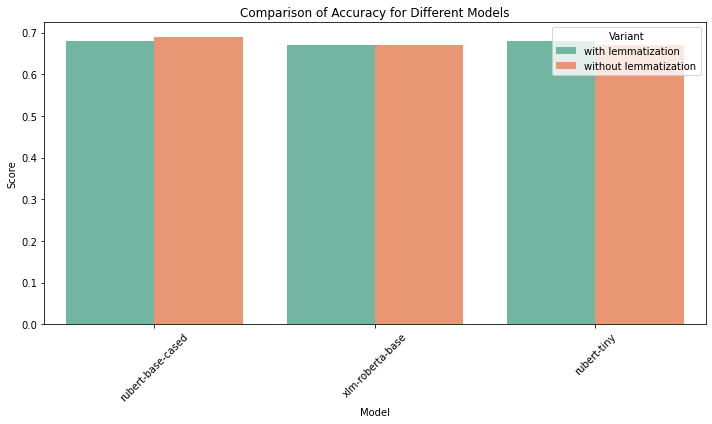

In [57]:
#Comparison of Accuracy across the models

plt.figure(figsize=(10, 6))

sns.barplot(x='Model', y='Accuracy', hue='Variant', data=df, palette='Set2', dodge=True)

plt.title('Comparison of Accuracy for Different Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Variant')

plt.tight_layout()
plt.show()


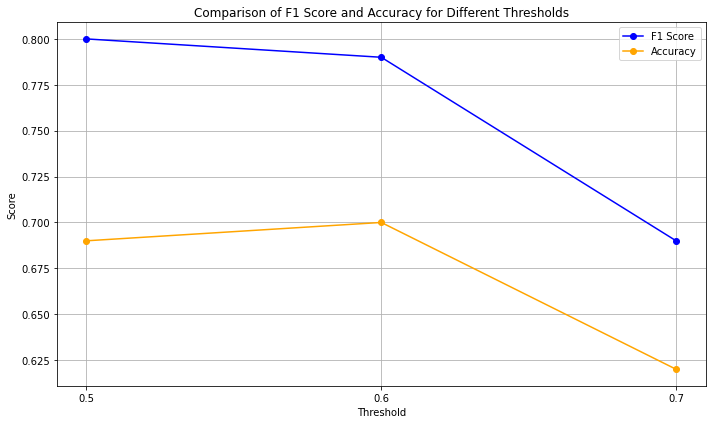

In [62]:
# Comparison of thresholds across the models
thresholds = [0.5, 0.6, 0.7]
f1_scores = [0.8, 0.79, 0.69]
accuracies = [0.69, 0.7, 0.62]

plt.figure(figsize=(10, 6))

plt.plot(thresholds, f1_scores, marker='o', label='F1 Score', color='blue')

plt.plot(thresholds, accuracies, marker='o', label='Accuracy', color='orange')

plt.title('Comparison of F1 Score and Accuracy for Different Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.xticks(thresholds)
plt.legend()

plt.grid(True)

plt.tight_layout()

plt.savefig('threshold_scores_comparison.png', dpi=300)

plt.show()

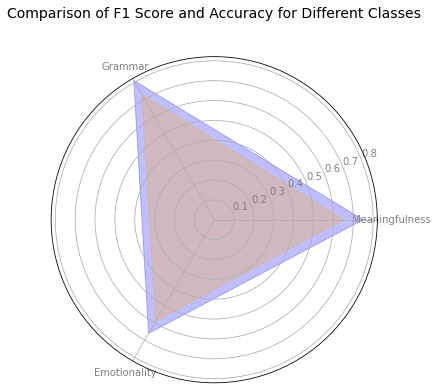

In [63]:
# Comparison of F1 Score and Accuracy for Different Classes

classes = ['Meaningfulness', 'Grammar', 'Emotionality']
f1_scores = [0.75, 0.81, 0.661]
accuracies = [0.65, 0.73, 0.59]

num_vars = len(classes)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

f1_scores += f1_scores[:1]
accuracies += accuracies[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, f1_scores, color='blue', alpha=0.25)
ax.fill(angles, accuracies, color='orange', alpha=0.25)

plt.xticks(angles[:-1], classes, color='grey', size=10)
plt.yticks(color='grey', size=10)
plt.title('Comparison of F1 Score and Accuracy for Different Classes', size=14, color='black', y=1.1)

plt.savefig('radar_chart_classes_comparison.png', dpi=300)

plt.show()